<img style="width: 300px; padding: 0px;" src="ToyNetworkCommunities.png" alt="title pics"/>


<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Finding communities in a network </b></p>

<p style="text-align:center; font-size:24px; margin-bottom: 32px;"><b> Satoru Hayasaka, Ph.D.</b></p>


<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>December 18, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. What is a network?
<hr style="height:1px;border:none" />

## 1.1 Nodes & edges
A network consists of a collection of:

  * **Nodes**: Also known as *vertices*. Nodes represent individual units. A node can be:
     * A person (in a social network)
     * A gene (in a gene expression network)
     * A computer server (in a computer network)
     * And so on...
  * **Edges**: Also known as *arcs* or *connections*. Edges represent relationships between units. An edge can be 
     * A friendship between people (in a social network)
     * A gene-gene association (in a gene expression network) 
     * A cable (in a computer network)
     * And so on...

<img style="width: 600px; padding: 0px;" src="Title_Graph.png" alt="Sample network"/>

<p style="text-align:center; font-size:12px; margin-top: 5px; margin-left:50px; margin-right:50px; margin-bottom:30px"> S&amp;P500 network: Nodes=companies, edges=strong correlations in stock prices. Visualized by Gephi. </p>


## 1.2 Example networks

### Les Miserables interaction network

In this example
  * Nodes: characters from Victor Hugo's novel, Les Miserables
  * Edges: interactions among characters
  
As you can imagine, the main protagonist, Valjean, is the center of this network.

In [1]:
%matplotlib inline

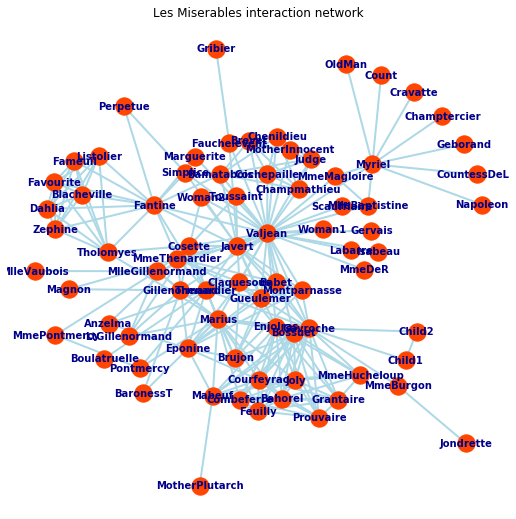

In [2]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# loading the Les Miserables network
G = nx.read_gml(os.path.join('NetworkData','lesmis.gml'))

# drawing the graph  --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_color='orangered')
nx.draw_networkx_edges(G, pos, width=2.0, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='darkblue',
                        font_weight='bold')
plt.axis('off')
plt.title('Les Miserables interaction network')
plt.show()



### Adjacency matrix

An **adjacency matrix** is used to represent a network. In an adjacency matrix, rows and columns correspond to nodes. Each element describe the presence or absence of an edge between two nodes.

In [3]:
A = nx.adjacency_matrix(G)
NetworkData = pd.DataFrame(A.todense(), columns=G.nodes())
NetworkData['Nodes'] = G.nodes()
NetworkData.set_index('Nodes', inplace=True)

In [4]:
NetworkData

,Myriel,Napoleon,MlleBaptistine,MmeMagloire,CountessDeLo,Geborand,Champtercier,Cravatte,Count,OldMan,...,MotherPlutarch,Gueulemer,Babet,Claquesous,Montparnasse,Toussaint,Child1,Child2,Brujon,MmeHucheloup
Nodes,,,,,,,,,,,,,,,,,,,,,
Myriel,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Napoleon,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MlleBaptistine,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MmeMagloire,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CountessDeLo,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toussaint,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Child1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Child2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


The entire adjacency matrix can be shown as an image.

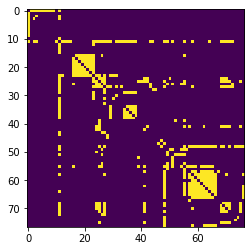

In [5]:
plt.imshow(A.todense())
plt.show()

Presence or absence of edges is denoted by 1's or 0's, respectively

### Brain connectivity network

This network represents how 188 distinct brain areas communicate with each other, captured by functional MRI. 
  * Nodes: distinct brain areas
  * Edges: strong temporal correlations in fMRI signals between brain areas.

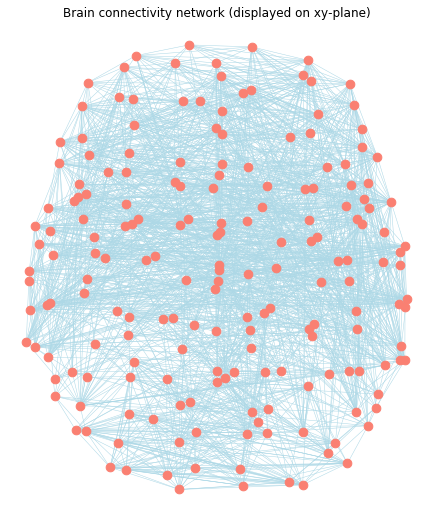

In [6]:
# Files for the brain network data
fTS = os.path.join('NetworkData','Oxford_sub16112_Rt2_K200.npz')
fG = os.path.join('NetworkData','Oxford_sub16112_WBWMCSF_Rt2_K200_deg20.adjlist')

# reading node info and the adjacency info
nodes = np.load(fTS)['nodes']
xyz = np.load(fTS)['xyz']
G = nx.read_adjlist(fG, nodetype=int)



###### drawing the graph
# dictionary of xy-coordinates
pos = {}
for iROI in range(len(nodes)):
    pos[nodes[iROI]] = xyz[iROI,:2]

plt.figure(figsize=[7.5,9])
nx.draw_networkx_nodes(G, pos, node_color='salmon', node_size=75)
nx.draw_networkx_edges(G, pos, width=0.5, edge_color='lightblue')
plt.axis('off')
plt.title('Brain connectivity network (displayed on xy-plane)')
plt.show()


# 2. Network communities
<hr style="height:1px;border:none" />

## 2.1 Motivating example

In some network data, you may observe that some nodes are strongly interconnected among themselves, forming clusters. On the other hand, connections between such clusters are very sparse. Such interconnected clusters of nodes are often referred as **clusters**, **communities**, or **modules**. Here is a toy example of such clusters.

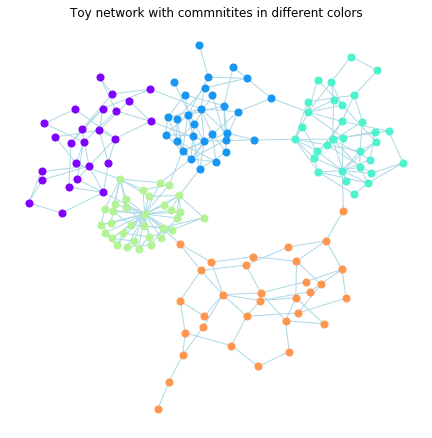

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.generators.community import LFR_benchmark_graph

##### Custom distinct color function --- to be used later
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)


# first, a simple toy example of modular network
n = 150
tau1 = 3.0
tau2 = 2.0
mu = 0.0675
G_list = []
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5,
                        min_community=25, seed=10)



# drawing the graph --- Kamada-Kawai layout
# without community assignment
plt.figure(figsize=[7.5,7.5])
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes

# extracting community assignment indices
commIndSet = {frozenset(G.nodes[v]['community']) for v in G}
commInd = [list(x) for x in iter(commIndSet)]
nComm = len(commInd)

# drawing with community assignment
node_color_list = get_cmap(nComm+1,'rainbow')
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
for iComm in range(nComm):
    nx.draw_networkx_nodes(G, pos, nodelist=commInd[iComm],
                           node_color = np.array([node_color_list(iComm)]),
                           node_size=50)
plt.title('Toy network with commnitites in different colors')
plt.axis('off')
plt.show()

## 2.2 Why should we care about network communities?

Because identifying network communities often reveal the underlying partition or grouping of nodes solely based on network connections. Here is an example.

<img style="width:500px; padding: 0px;" src="SantaFeCollabNet.jpg" alt="Santa Fe Institute Collaboration Network"/>

<p style="text-align:center; font-size:12px;"><i>Girvan & Newman (2002), PNAS 99(12):7821-7826</i></p>

In this network, 
  * Nodes: researchers at Santa Fe Institute, an interdisciplinary research institute. 
  * Edges: collaborations between researchers. 
  * Network communities are denoted by different node symbols

Notice that network communities roughly correspond to areas of expertise. 

## 2.3 Finding network communities

Finding a community partition in a network is analogous to clustering in unsupervised learning. 
  * Finding the true community partition from network data is an ***NP-Complete problem***.  
  * Community detection algorithms: Main goal to find *sufficiently good* approximate solutions. 
  * Popular approach: Finding a community partition by maximizing **modularity**, **Q**.

### Modularity Q
What is modularity? It describes how modular a network is. In brief:

  * Calculated by comparing the number of within-community edges (observed vs random networks)
     * In a modular network, more within-community edges by chance alone
  * Q ranges between -0.5 to 1. 
     * Q $\simeq$ 1 indicates the network being modular
     * Q $\simeq$ 0 means the network doesn't have communities


### Louvain method

For our example, we will use the **Louvain modularity method**. It is a greedy optimization method for agglomerative community formation; it optimizes modularity Q by:

  * First, each node is treated as a community
  * Two communities are merged if the merger improves Q the most.
  * Communities are merged until Q cannot be improved anymore

# 3. Application - network communities
<hr style="height:1px;border:none" />

## 3.1 Les Miserables interaction network

Let's see how the Les Miserables network can be broken up into communities by the Louvain method.

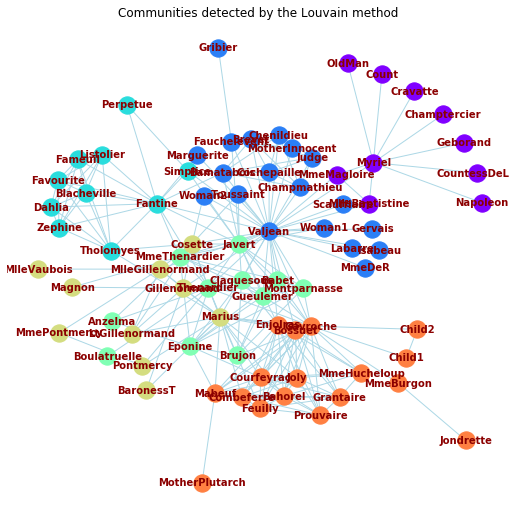

In [8]:
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community   # Louvain method

##### Custom distinct color function --- to be used later
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)




##### loading network data
# loading the Les Miserables network
G = nx.read_gml(os.path.join('NetworkData','lesmis.gml'))


##### Community detection with the Louvain method
partition = community.best_partition(G)

###### drawing the graph 
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
nComm = max([comm for comm in partition.values()])+1
node_color_list = get_cmap(nComm+1,'rainbow')
for iComm in range(nComm):
    nodeList = [iNode for iNode,Comm in partition.items()
                if Comm==iComm]
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=nodeList,
                           node_color = np.array([node_color_list(iComm)]))
nx.draw_networkx_edges(G, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='DarkRed',
                        font_weight='bold')
plt.title('Communities detected by the Louvain method')
plt.axis('off')
plt.show()

We can see that there are *circles of interactions* among the characters. Some communities have very limited direct interaction with the main character Valjean.  Now let's examine how modular this networks is

In [9]:
community.modularity(partition, G)

0.5582723665447331

## 3.2 Brain connectivity network

The brain network constitutes a number of sub-networks of brain areas. We can identify such sub-networks by identifying network communities.

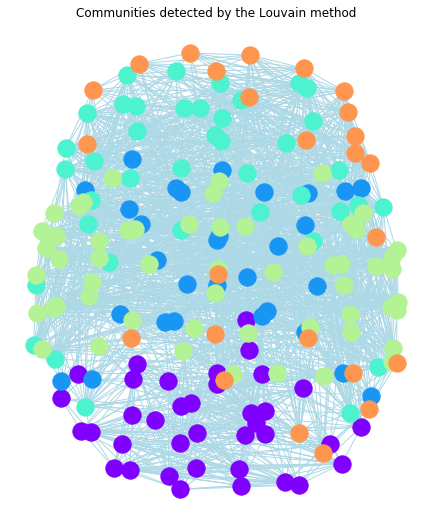

In [10]:
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community   # Louvain method

##### Custom distinct color function --- to be used later
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)



##### loading network data
# Files for the brain network data
fTS = os.path.join('NetworkData','Oxford_sub16112_Rt2_K200.npz')
fG = os.path.join('NetworkData','Oxford_sub16112_WBWMCSF_Rt2_K200_deg20.adjlist')

# reading node info and the adjacency info
nodes = np.load(fTS)['nodes']
xyz = np.load(fTS)['xyz']
G = nx.read_adjlist(fG, nodetype=int)



##### Community detection with the Louvain method
partition = community.best_partition(G)



###### drawing the graph 
# dictionary of xy-coordinates
pos = {}
for iROI in range(len(nodes)):
    pos[nodes[iROI]] = xyz[iROI,:2]

plt.figure(figsize=[7.5,9])
nComm = max([comm for comm in partition.values()])+1
node_color_list = get_cmap(nComm+1,'rainbow')
for iComm in range(nComm):
    nodeList = [iNode for iNode,Comm in partition.items()
                if Comm==iComm]
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=nodeList,
                           node_color = np.array([node_color_list(iComm)]))
nx.draw_networkx_edges(G, pos,
                       edge_color='lightblue')
plt.title('Communities detected by the Louvain method')
plt.axis('off')
plt.show()

As you can see, the brain network can be broken up into communities. Communities are often symmetric between the left and right hemispheres, and are spatially clustered. The modularity Q of this partition is

In [11]:
community.modularity(partition, G)

0.49401270371208694

# 4. Accuracy of community partition
<hr style="height:1px;border:none" />

In some network data, the true community organization is known. In such a case, we can examine the accuracy of estimated community partitions by using the **adjusted Rand index** (**ARI**). The ARI describes the similarity in clustering. 
  * The ARI ranges from -1.0 to 1.0. 
  * ARI close to 0: poor correspondence between true and predicted communities
  * ARI close to 1.0: similarity in predicted and true community partitions.

As an example, we examine the college football network. 
  * Nodes: colleges in NCAA Division I football 
  * Edges: matches between different schools
  * Communities: conferences
  * There are more within-conference matches than between-conference matches

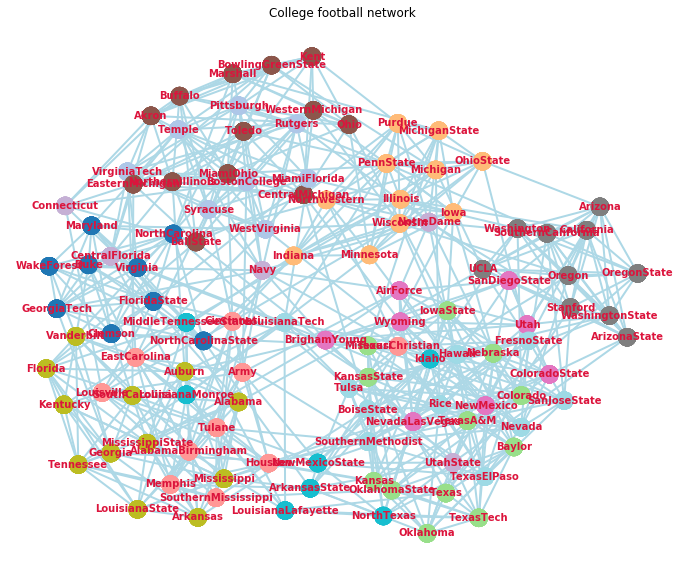

In [12]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import community   # Louvain method
from sklearn.metrics import adjusted_rand_score

# loading the college football network
G = nx.read_gml(os.path.join('NetworkData','football.gml'))
y_true = [d['value'] for n, d in G.nodes(data=True)]  # true conf labels


# drawing the graph  --- Kamada-Kawai layout
plt.figure(figsize=[12,10])
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
# extracting conference information
conf = []
for i,d in G.nodes(data=True):
    conf.append(d['value'])
# drawing nodes, different conferences in different colors
for iConf in range(12):
    nx.draw_networkx_nodes(G, pos,
                           cmap=plt.cm.tab20, node_color=conf)
nx.draw_networkx_edges(G, pos, width=2.0, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='Crimson',
                        font_weight='bold')
plt.axis('off')
plt.title('College football network')
plt.show()


Now we try to predict these communities (or conferences) with the Louvain method.

In [13]:
##### Custom distinct color function --- to be used later
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

##### Community detection with the Louvain method
partition = community.best_partition(G)
# A list of predicted module labels
y_pred = []
for iCollege in G.nodes():
    y_pred.append(partition[iCollege])   

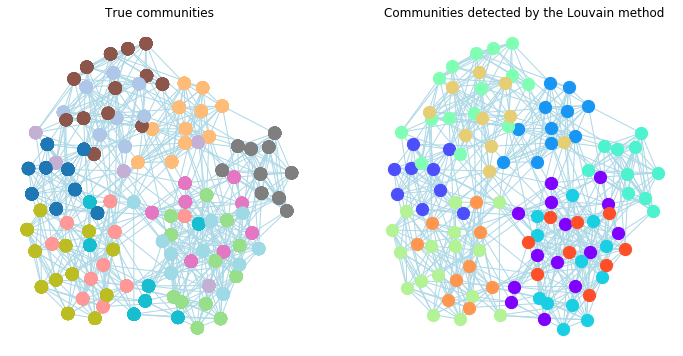

In [14]:
###### drawing the graph 
plt.figure(figsize=[12,6])

plt.subplot(121)
# drawing nodes, different conferences in different colors
for iConf in range(12):
    nx.draw_networkx_nodes(G, pos, node_size=150,
                           cmap=plt.cm.tab20, node_color=conf)
nx.draw_networkx_edges(G, pos, width=1.0, edge_color='lightblue')
#nx.draw_networkx_labels(G, pos, font_size=10, font_color='DarkGreen',
#                        font_weight='bold')
plt.axis('off')
plt.title('True communities')


plt.subplot(122)
nComm = max([comm for comm in partition.values()])+1
node_color_list = get_cmap(nComm+1,'rainbow')
for iComm in range(nComm):
    nodeList = [iNode for iNode,Comm in partition.items()
                if Comm==iComm]
    nx.draw_networkx_nodes(G, pos, node_size=150,
                           nodelist=nodeList,
                           node_color = np.array([node_color_list(iComm)]))
nx.draw_networkx_edges(G, pos, width=1.0, 
                       edge_color='lightblue')
#nx.draw_networkx_labels(G, pos, font_size=10, font_color='DarkRed',
#                        font_weight='bold')
plt.title('Communities detected by the Louvain method')
plt.axis('off')
plt.show()

The accuracy of the community partition result can be assessed by ARI.

In [15]:
adjusted_rand_score(y_true,y_pred)

0.8069408992735126

As you can see, it is quite accurate.